## Imports

In [36]:
import matplotlib.pyplot as plt

## Data Loading

In [37]:
from datasets import load_dataset # Import dataset import function for hugging face
dataset = load_dataset("surrey-nlp/PLOD-CW") # import the coursework dataset from

In [38]:
train_tokens = dataset["train"]["tokens"]
train_pos_tags = dataset["train"]["pos_tags"]
train_ner_tags = dataset["train"]["ner_tags"]

validation_tokens = dataset["validation"]["tokens"]
validation_pos_tags = dataset["validation"]["pos_tags"]
validation_ner_tags = dataset["validation"]["ner_tags"]

test_tokens = dataset["test"]["tokens"]
test_pos_tags = dataset["test"]["pos_tags"]
test_ner_tags = dataset["test"]["ner_tags"]

def data_to_lower(data:list[list[str]]) -> list[list[str]]:
    return [[token.lower() for token in tokens] for tokens in data]


train_tokens = data_to_lower(train_tokens)
validation_tokens = data_to_lower(validation_tokens)
test_tokens = data_to_lower(test_tokens)

class DataItem:
    def __init__(self, tokens, pos, ner):
        self.tokens:list[str] = tokens
        self.pos:list[str] = pos
        self.ner:list[str] = ner

    def get_as_tuple(self) -> tuple:
        return (self.tokens, self.pos, self.ner)
    
    def get_as_tuple_list(self) -> list[tuple]:
        tuple_list = []
        for idx in range(len(self.tokens)-1):
            tuple_list.append((self.tokens[idx], self.pos[idx], self.ner[idx]))
        return tuple_list
    
train_data:list[DataItem] = []
for idx in range(len(train_tokens)):
    train_data.append(DataItem(train_tokens[idx], train_pos_tags[idx], train_ner_tags[idx]))

validation_data:list[DataItem] = []
for idx in range(len(validation_tokens)):
    train_data.append(DataItem(validation_tokens[idx], validation_pos_tags[idx], validation_ner_tags[idx]))

test_data:list[DataItem] = []
for idx in range(len(test_tokens)):
    train_data.append(DataItem(test_tokens[idx], test_pos_tags[idx], test_ner_tags[idx]))

## Frequency

### Label Frequency

In [39]:
def get_ner_frequency(data:list[DataItem]) -> dict:
    frequency_dict:dict = {}
    for d_item in data:
        for ner in d_item.ner:
            if ner not in frequency_dict.keys():
                frequency_dict[ner] = 1
            else:    
                frequency_dict[ner] = frequency_dict[ner] + 1
    return frequency_dict

frequency = get_ner_frequency(train_data)
frequency

{'B-O': 41524, 'B-LF': 1761, 'I-LF': 3846, 'B-AC': 2869}

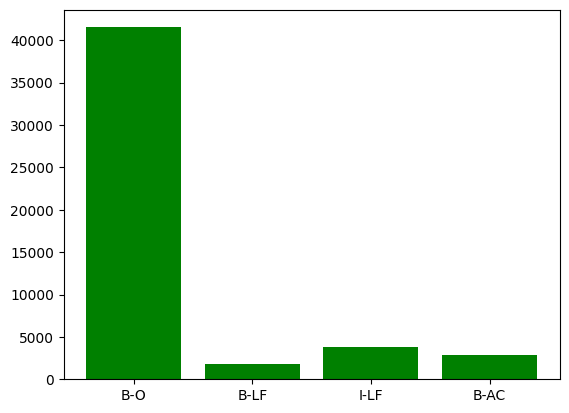

In [40]:
plt.bar(frequency.keys(), frequency.values(), color='g')
plt.show() # frequency of classes / labels

## Word Frequency

In [44]:
def get_word_frequency(data:list[DataItem]) -> dict:
    word_frequency:dict = {"total_tokens":0, "unique_tokens":0, "unique_token_frequency":{}}
    for data_item in data:
        for token in data_item.tokens:
            if token not in word_frequency["unique_token_frequency"].keys():
                word_frequency["unique_token_frequency"][token] = 1
                word_frequency["unique_tokens"] = word_frequency["unique_tokens"] + 1
            else:
                word_frequency["unique_token_frequency"][token] = word_frequency["unique_token_frequency"][token] + 1
            word_frequency["total_tokens"] = word_frequency["total_tokens"] + 1
    return word_frequency

print(get_word_frequency(train_data))

{'total_tokens': 50000, 'unique_token_count': 9638, 'unique_token_frequency': {'for': 306, 'this': 98, 'purpose': 1, 'the': 1611, 'gothenburg': 1, 'young': 3, 'persons': 4, 'empowerment': 1, 'scale': 10, '(': 1969, 'gypes': 1, ')': 1947, 'was': 236, 'developed': 17, '.': 1351, 'following': 19, 'physiological': 2, 'traits': 1, 'were': 251, 'measured': 20, ':': 209, 'stomatal': 1, 'conductance': 1, 'gs': 3, ',': 2776, 'mol': 1, 'h2o': 3, 'm-2': 4, 's-1': 4, 'transpiration': 1, 'rate': 41, 'e': 23, 'mmol': 1, 'net': 4, 'photosynthetic': 1, 'pn': 3, 'μmol': 2, 'and': 1133, 'intercellular': 1, 'co2': 4, 'concentration': 14, 'ci': 38, 'minor': 2, 'h': 18, 'antigen': 14, 'alloimmune': 1, 'responses': 9, 'readily': 2, 'occur': 4, 'in': 805, 'setting': 5, 'of': 1284, 'human': 43, 'leukocyte': 2, 'hla)–matched': 1, 'allogeneic': 1, 'solid': 4, 'organ': 4, 'stem': 13, 'cell': 97, 'transplantation': 6, 'sct': 1, '[': 449, '3,4': 1, ']': 470, 'epi': 2, '=': 132, 'echo': 2, 'planar': 3, 'imaging': 7